# **Elektronica Spring Camp**
## **EEG Signal Processing**

In [136]:
import numpy as np
import pandas as pd
from os.path import split
from scipy.signal import stft, spectrogram
from scipy.signal.windows import dpss
import matplotlib.pyplot as plt

## **Bio-Amp EXG Pill**

### **Pre-processing**

In [137]:
def read_csv(file_name):
  df = pd.read_csv(file_name, header=None)
  data = np.array(df[0])
  signal_clean = data[data != 0]
  return signal_clean

In [138]:
attention=read_csv('attention.csv')
meditation=read_csv('relaxed.csv')

In [139]:
sampling_rate=250

In [140]:
def split_signal(signal, sampling_rate):
    size_split = sampling_rate
    num_splits = len(signal) // size_split
    split_signal_tot = []

    for i in range(num_splits):
        start = i * size_split
        end = start + size_split
        split_signal = signal[start:end]
        split_signal_tot.append(split_signal)

    split_signal_tot = np.array(split_signal_tot)
    return split_signal_tot


In [141]:
split_signal_attention=split_signal(attention,sampling_rate)
split_signal_meditation=split_signal(meditation,sampling_rate)

### **Ensemble Avergaing***

In [142]:
def average_signal(split_signal_tot):
    averages = np.mean(split_signal_tot, axis=1)
    return averages

In [143]:
average_signal_attention=average_signal(split_signal_attention)
average_signal_meditation=average_signal(split_signal_meditation)

In [144]:
def normalize_signal(signal):
    normalized_signal = (signal - np.mean(signal)) / np.std(signal)
    return normalized_signal

In [145]:
def compute_stft(signal_data, fs, window_size):
    f, t, Zxx = stft(signal_data, fs, nperseg=window_size)
    Zxx=normalize_signal(Zxx)
    plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.ylim(0,20)
    plt.show()
    return f, t, Zxx

In [146]:
def plot_signal(signal,sampling_rate):
  time = np.arange(0, len(signal) / sampling_rate, 1 / sampling_rate)
  plt.plot(time, signal,color="orange")
  plt.xlabel('Time (s)')
  plt.ylabel('Amplitude')
  plt.show()

In [147]:
average_signal_attention=normalize_signal(average_signal_attention)
average_signal_meditation=normalize_signal(average_signal_meditation)

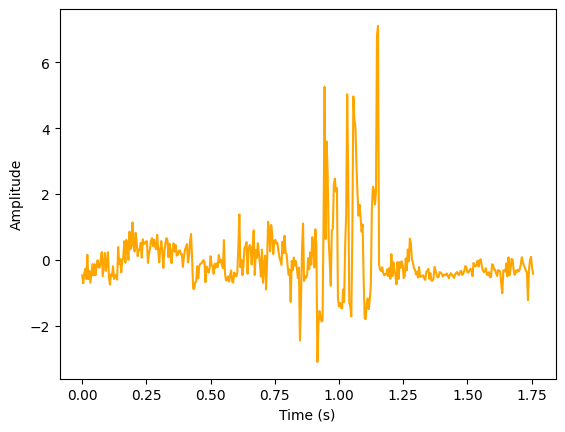

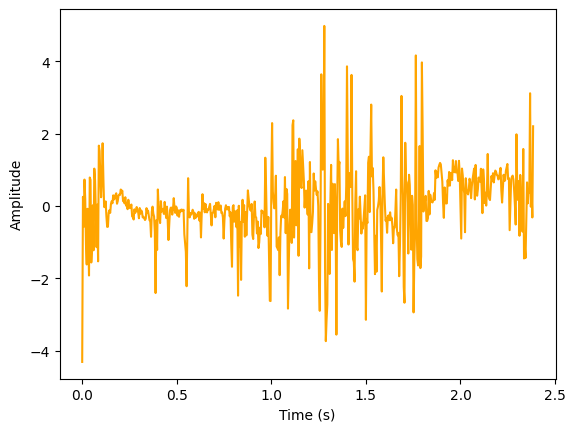

In [148]:
plot_signal(average_signal_attention,sampling_rate)
plot_signal(average_signal_meditation,sampling_rate)

### **Plotting  Spectra**

**Short-Time Fourier Transform (STFT)**

The Short-Time Fourier Transform (STFT) is used to analyze the signal's frequency content as it changes over time.

Mathematically, STFT is defined as:

$$
X(t,f) = \int_{-\infty}^{\infty} x(\tau) \cdot w(t - \tau) \cdot e^{-j 2 \pi f \tau} \, d\tau
$$

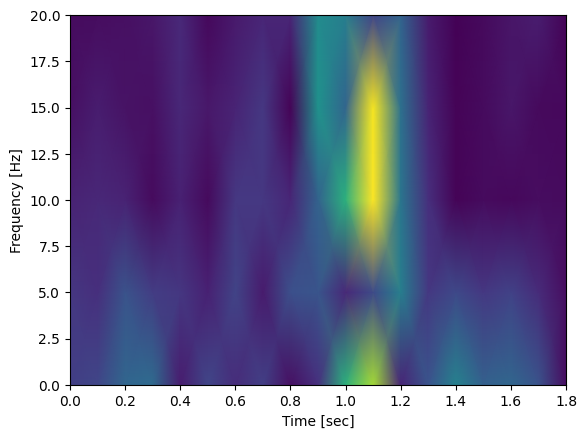

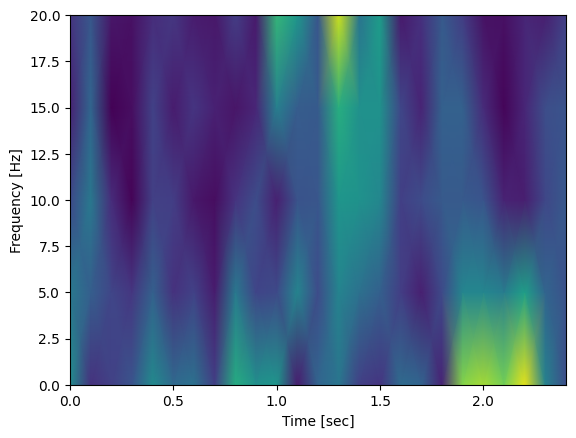

In [149]:
t,f,Zxx=compute_stft(average_signal_attention,sampling_rate,50)
t,f,Zxx=compute_stft(average_signal_meditation,sampling_rate,50)

## **Electrocorticography (ECoG)**

In [150]:
import scipy.io as sio

cond1 = sio.loadmat("Condition1.mat")
mat1 = cond1['final_mat_condition3']  # Data for Condition 1
cond2 = sio.loadmat("Condition2.mat")
mat2 = cond2['final_mat_condition7']  # Data for Condition 2

### **Pre-Processing**

In [151]:
sampling_rate = 512

In [152]:
def average_data(mat):
    return np.mean(mat, axis=0)

In [153]:
def plot_signal(signal_data, fs):
    time = np.arange(0, len(signal_data) / fs, 1 / fs)
    plt.figure(figsize=(8, 4))
    plt.plot(time, signal_data, color='orange', alpha=0.7)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('Evoked Potential')
    plt.show()

In [154]:
def plot_trial(data, fs):
    plt.figure(figsize=(10, 6))
    for i in range(data.shape[0]):
        time = np.arange(0, len(data[i]) / fs, 1 / fs)
        plt.plot(time, data[i], alpha=0.5)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('Individual Trials')
    plt.show()

###  **Ensemble Avergaing**

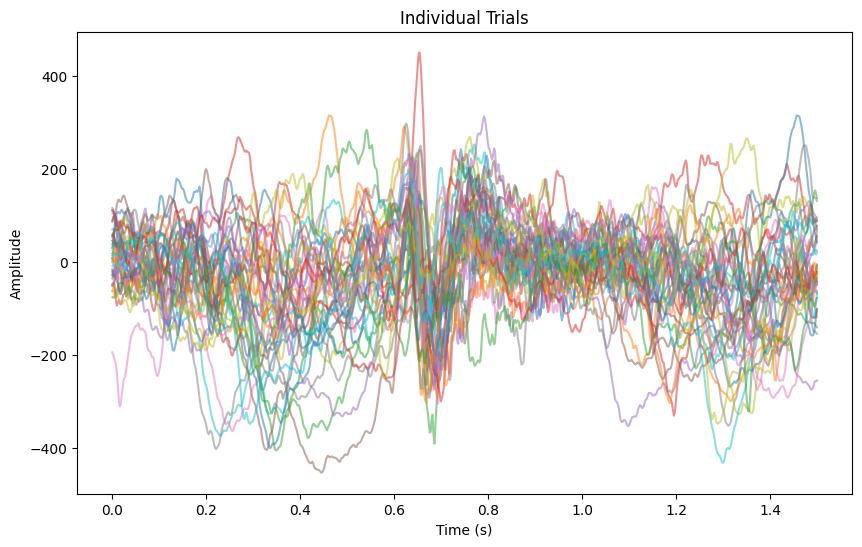

In [155]:
plot_trial(mat1, sampling_rate)

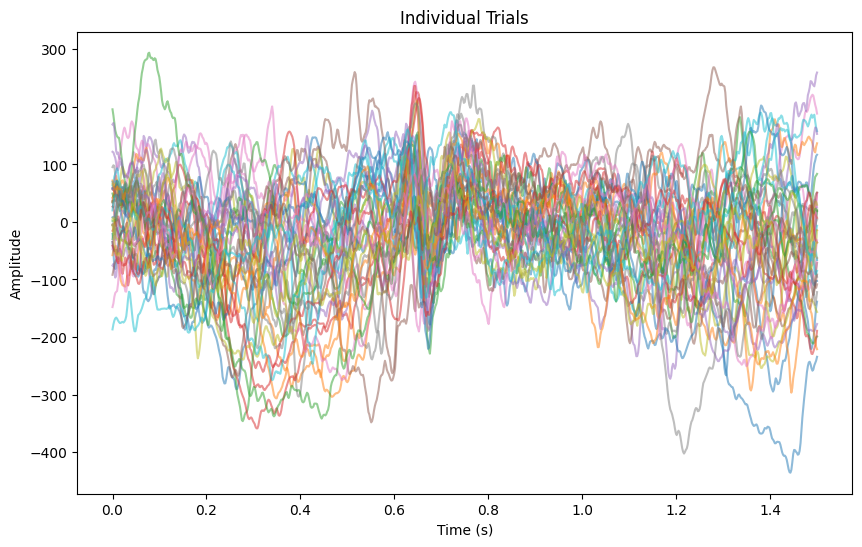

In [156]:
plot_trial(mat2, sampling_rate)

In [157]:
evoked_signal_1 = average_data(mat1)
evoked_signal_2 = average_data(mat2)

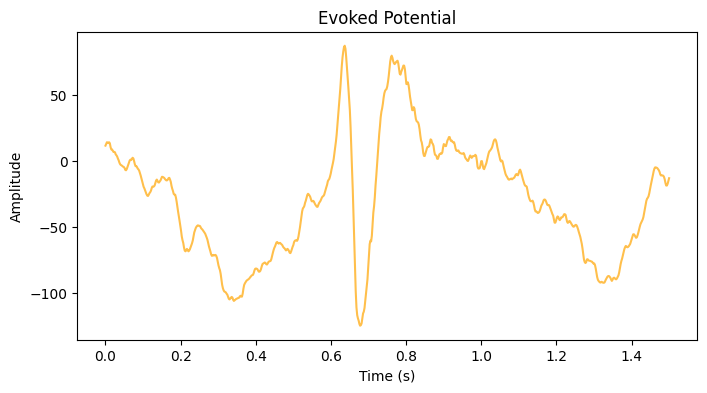

In [158]:
plot_signal(evoked_signal_1, sampling_rate)

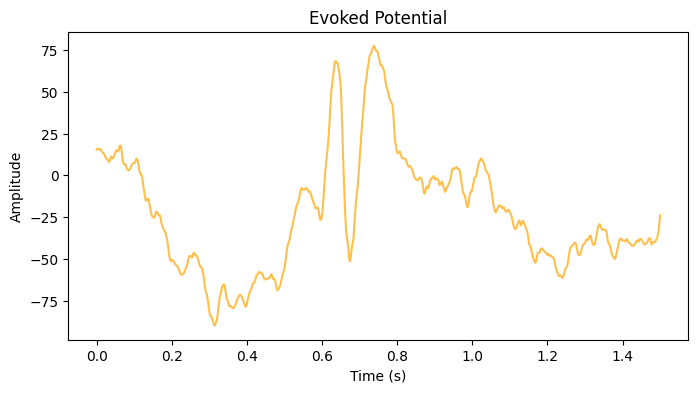

In [159]:
plot_signal(evoked_signal_2, sampling_rate)

### **Plotting Spectra**

In [168]:
def normalize_relative_change_tfr(tfr):
    mean_power = np.mean(tfr, axis=0, keepdims=True)
    stand_power = np.std(tfr, axis=0, keepdims=True)
    return (tfr - mean_power) / mean_power

In [169]:
def compute_stft_normalize(signal1, signal2, fs, window_size):
    f, t, Zxx1 = stft(signal1, fs, nperseg=window_size)
    f, t, Zxx2 = stft(signal2, fs, nperseg=window_size)
    Zxx1 = normalize_relative_change_tfr(Zxx1)
    Zxx2 = normalize_relative_change_tfr(Zxx2)
    plot_stft_2(t, f, Zxx1, Zxx2)
    return f, t, Zxx1, Zxx2

In [170]:
def plot_stft_2(t, f, Zxx1, Zxx2):
    plt.figure(figsize=(10, 8))
    plt.subplot(2, 1, 1)
    plt.pcolormesh(t, f, np.abs(Zxx1), shading='gouraud', cmap='jet')
    plt.colorbar()
    plt.title('Normalized STFT - Condition 1')
    plt.ylim(0, 30)

    plt.subplot(2, 1, 2)
    plt.pcolormesh(t, f, np.abs(Zxx2), shading='gouraud', cmap='jet')
    plt.colorbar()
    plt.title('Normalized STFT - Condition 2')
    plt.xlabel('Time (sec)')
    plt.ylabel('Frequency [Hz]')
    plt.ylim(0, 30)
    plt.tight_layout()
    plt.show()

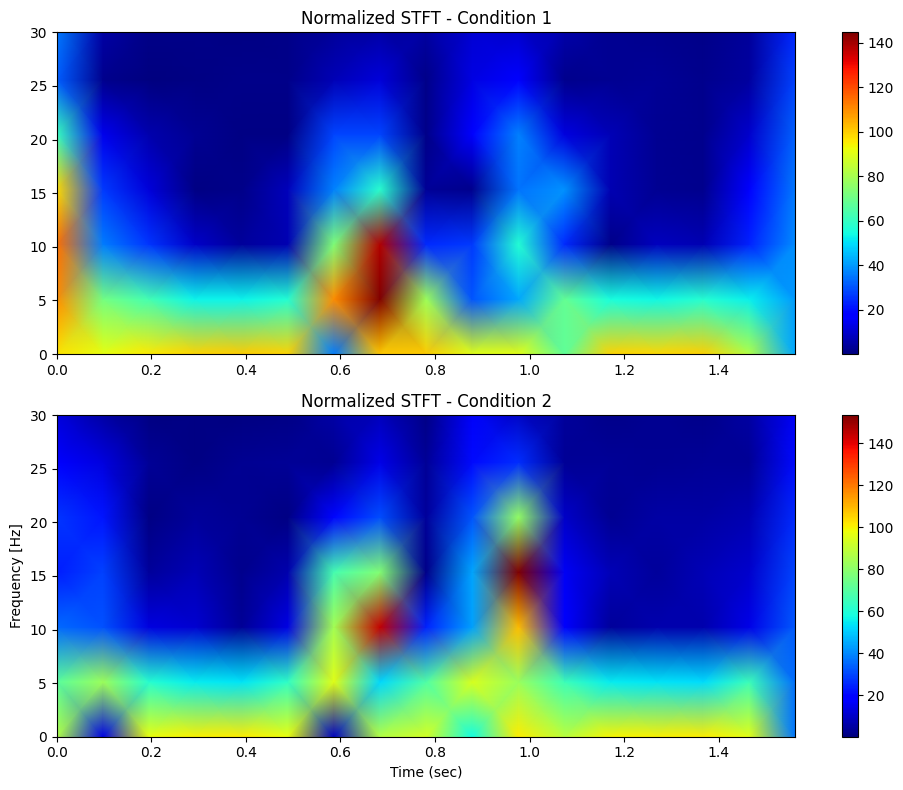

In [171]:
t,f,Zxx1,Zxx2=compute_stft_normalize(evoked_signal_1, evoked_signal_2, sampling_rate, 100)